In [1]:
import os
import glob
import netCDF4
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec
import cartopy.crs as ccrs
import cartopy.feature
import seaborn as sns

import wrf
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib.colors

In [2]:
###############################################################
# CHARGE SFC variables
###############################################################

#Parameters
folders = ['ANT_20220315_past', 'ANT_20220315_s245', 'ANT_20220315_s585']
models = ['CAS-ESM2-0', 'CMCC-CM2-SR5','CMCC-ESM2','EC-Earth3','FGOALS-f3-L','MRI-ESM2-0']
variables = ['siconc']
#filename_CMIP6 = '/users/gsergi/PGW_Simulations/1c.extract_regrid_deltas_CMIP6/'+folder+'/deltas/'

for folder in folders:
    print(folder)
    for model in models:
        print(model)
        for variable in variables:
            print(variable)
            ncdf_cmip6_file = '/users/gsergi/PGW_Simulations_projectfolder/1c.extract_regrid_deltas_CMIP6/'+folder+'/deltas/'+model+'/'+variable+'_*.nc'
            print(ncdf_cmip6_file)
            ncdf_delta = netCDF4.Dataset(glob.glob(ncdf_cmip6_file)[0])

            if 'lon' not in ncdf_delta.variables.keys():
                #Get dimension
                lons_grid = ncdf_delta.variables['longitude'][:]
                lats_grid = ncdf_delta.variables['latitude'][:]
                time = ncdf_delta.variables['time'][:]
                
                #Get variables
                #lons_grid, lats_grid = np.meshgrid(lons, lats)
                weighting_grid = np.sqrt(np.cos(lats_grid*np.pi/180))
                var_mean_ANT = np.sum(np.ma.masked_where(lats_grid<-60, weighting_grid) * np.ma.masked_where(lats_grid<-60, ncdf_delta.variables[variable][3,:,:])) / np.sum(np.ma.masked_where(lats_grid<-60, weighting_grid))
                print(var_mean_ANT)

            else:
                #Get dimension
                lons = ncdf_delta.variables['lon'][:]
                lats = ncdf_delta.variables['lat'][:]
                time = ncdf_delta.variables['time'][:]
                
                #Get variables
                lons_grid, lats_grid = np.meshgrid(lons, lats)
                weighting_grid = np.sqrt(np.cos(lats_grid*np.pi/180))
                var_mean_ANT = np.sum(weighting_grid[:np.where(lats<-60)[0][-1] + 1,:] * ncdf_delta.variables[variable][3,:np.where(lats<-60)[0][-1] + 1,:]) / np.sum(weighting_grid[:np.where(lats<-60)[0][-1] + 1,:])
                print(var_mean_ANT)
    print(' ')

            
######################
# ANT COORDINATES
# Get surface fix variables
#height = wrf.getvar(wrflist_oh, 'HGT', timeidx=0, method="cat")[:,:]
# Get dimension
#lats, lons = wrf.latlon_coords(t2_ant_hist)
#times = wrf.extract_times(wrflist_oh, timeidx=wrf.ALL_TIMES)

ANT_20220315_past
CAS-ESM2-0
siconc
/users/gsergi/PGW_Simulations_projectfolder/1c.extract_regrid_deltas_CMIP6/ANT_20220315_past/deltas/CAS-ESM2-0/siconc_*.nc


/tmp/ipykernel_111168/674074716.py:29: RuntimeWarning: invalid value encountered in sqrt
  weighting_grid = np.sqrt(np.cos(lats_grid*np.pi/180))


-0.08349767759651969
CMCC-CM2-SR5
siconc
/users/gsergi/PGW_Simulations_projectfolder/1c.extract_regrid_deltas_CMIP6/ANT_20220315_past/deltas/CMCC-CM2-SR5/siconc_*.nc
-0.28115703182258484
CMCC-ESM2
siconc
/users/gsergi/PGW_Simulations_projectfolder/1c.extract_regrid_deltas_CMIP6/ANT_20220315_past/deltas/CMCC-ESM2/siconc_*.nc
-0.20795247314145757
EC-Earth3
siconc
/users/gsergi/PGW_Simulations_projectfolder/1c.extract_regrid_deltas_CMIP6/ANT_20220315_past/deltas/EC-Earth3/siconc_*.nc
-0.16963974005694266
FGOALS-f3-L
siconc
/users/gsergi/PGW_Simulations_projectfolder/1c.extract_regrid_deltas_CMIP6/ANT_20220315_past/deltas/FGOALS-f3-L/siconc_*.nc
-0.22613030893388492
MRI-ESM2-0
siconc
/users/gsergi/PGW_Simulations_projectfolder/1c.extract_regrid_deltas_CMIP6/ANT_20220315_past/deltas/MRI-ESM2-0/siconc_*.nc
-0.2609872639231905
 
ANT_20220315_s245
CAS-ESM2-0
siconc
/users/gsergi/PGW_Simulations_projectfolder/1c.extract_regrid_deltas_CMIP6/ANT_20220315_s245/deltas/CAS-ESM2-0/siconc_*.nc
-0.6290

ANT_20220315_hist-past
tas
0.8102592414486655
 
ts
0.792916094468234
 
tos
0.31802611184981033
 
hurs
-0.162119403285436
 
siconc
-1.1773691535130077
 
ANT_20220315_ssp245-hist
tas
3.244823490375615
 
ts
3.146116365760356
 
tos
1.5661944635338163
 
hurs
-0.24747844763236881
 
siconc
-3.0691571191702867
 
ANT_20220315_ssp585-hist
tas
3.244823490375615
 
ts
3.146116365760356
 
tos
1.5661944635338163
 
hurs
-0.24747844763236881
 
siconc
-3.0691571191702867
 


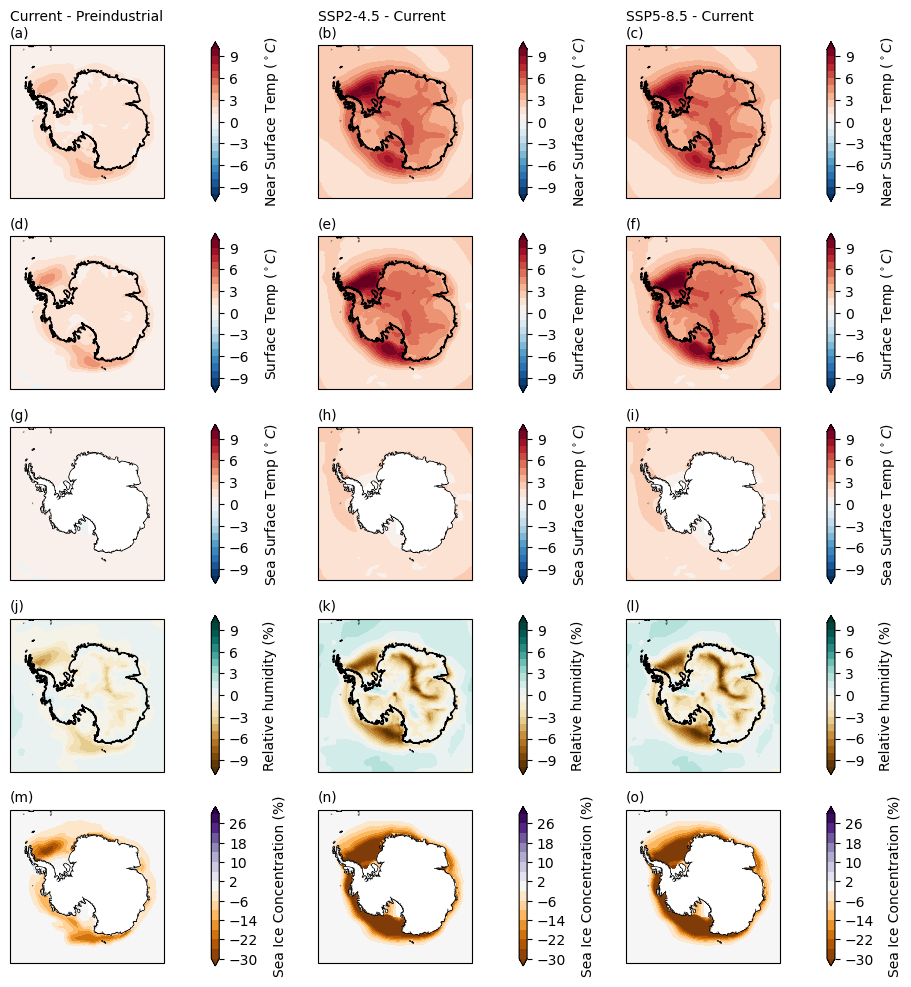

In [5]:
###############################################################
# CHARGE SFC variables
###############################################################

#Parameters
folders = ['ANT_20220315_hist-past', 'ANT_20220315_ssp245-hist', 'ANT_20220315_ssp585-hist']
variables = ['tas','ts', 'tos', 'hurs', 'siconc']
panels = ['Current - Preindustrial \n(a)','SSP2-4.5 - Current \n(b)','SSP5-8.5 - Current \n(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)','(m)','(n)','(o)','(p)','(q)','(r)']
#filename_CMIP6 = '/users/gsergi/PGW_Simulations/1c.extract_regrid_deltas_CMIP6/'+folder+'/deltas/'


#############################################
# Plot SFC comparison scenarios
#############################################

min_height = 10
#time_ini = 39
time_ix = 0
  
#####################
### Plot T2 & PSL ###
#Figure and axis
fig = plt.figure(figsize=[11,12])


for j,folder in enumerate(folders):
    print(folder)
    ncdf_cmip6_tas = '/users/gsergi/PGW_Simulations_projectfolder/1d.delta_ensembles/'+folder+'/tas_*.nc'
    ncdf_cmip6_ts = '/users/gsergi/PGW_Simulations_projectfolder/1d.delta_ensembles/'+folder+'/ts_*.nc'
    ncdf_cmip6_hurs = '/users/gsergi/PGW_Simulations_projectfolder/1d.delta_ensembles/'+folder+'/hurs_*.nc'
    ncdf_cmip6_tos = '/users/gsergi/PGW_Simulations_projectfolder/1d.delta_ensembles/'+folder+'/tos_*.nc'
    ncdf_cmip6_siconc = '/users/gsergi/PGW_Simulations_projectfolder/1d.delta_ensembles/'+folder+'/siconc_*.nc'
    
    ncdf_delta_tas = netCDF4.Dataset(glob.glob(ncdf_cmip6_tas)[0])
    ncdf_delta_ts = netCDF4.Dataset(glob.glob(ncdf_cmip6_ts)[0])
    ncdf_delta_hurs = netCDF4.Dataset(glob.glob(ncdf_cmip6_hurs)[0])
    ncdf_delta_tos = netCDF4.Dataset(glob.glob(ncdf_cmip6_tos)[0])
    ncdf_delta_siconc = netCDF4.Dataset(glob.glob(ncdf_cmip6_siconc)[0])

    for i,(variable,ncdf_delta) in enumerate(zip(['tas','ts', 'tos', 'hurs', 'siconc'],[ncdf_delta_tas, ncdf_delta_ts, ncdf_delta_tos, ncdf_delta_hurs, ncdf_delta_siconc])):
#    for i,(variable,ncdf_delta) in enumerate(zip(['tas'],[ncdf_delta_tas])):
        print(variable)

        if 'lon' not in ncdf_delta.variables.keys():
            #Get dimension
            lons_grid = ncdf_delta.variables['longitude'][:]
            lats_grid = ncdf_delta.variables['latitude'][:]
            time = ncdf_delta.variables['time'][:]
            
            #Get variables
            #lons_grid, lats_grid = np.meshgrid(lons, lats)
            weighting_grid = np.sqrt(np.cos(lats_grid*np.pi/180))
            var_ANT = ncdf_delta.variables[variable][3,:,:]
            var_mean_ANT = np.sum(np.ma.masked_where(lats_grid<-60, weighting_grid) * np.ma.masked_where(lats_grid<-60, ncdf_delta.variables[variable][3,:,:])) / np.sum(np.ma.masked_where(lats_grid<-60, weighting_grid))
            print(var_mean_ANT)
    
        else:
            #Get dimension
            lons = ncdf_delta.variables['lon'][:]
            lats = ncdf_delta.variables['lat'][:]
            time = ncdf_delta.variables['time'][:]
            
            #Get variables
            lons_grid, lats_grid = np.meshgrid(lons, lats)
            weighting_grid = np.sqrt(np.cos(lats_grid*np.pi/180))
            var_ANT = ncdf_delta.variables[variable][3,:,:]
            var_mean_ANT = np.sum(weighting_grid[:np.where(lats<-60)[0][-1] + 1,:] * ncdf_delta.variables[variable][3,:np.where(lats<-60)[0][-1] + 1,:]) / np.sum(weighting_grid[:np.where(lats<-60)[0][-1] + 1,:])
            print(var_mean_ANT)
        print(' ')

        if j == 0:
            var_ANT = var_ANT


        if variable in ['tas']:
            ax = fig.add_subplot(5, 3, i*3+j+1, projection=ccrs.SouthPolarStereo())
            CS1 = ax.contourf(lons_grid, lats_grid, var_ANT, np.arange(-10,10.1,1), cmap="RdBu_r", extend="both", transform=ccrs.PlateCarree())
            ax.coastlines(resolution='10m')
            CB = fig.colorbar(CS1, ax=ax, orientation='vertical', pad=0.2)
            CB.set_label('Near Surface Temp ($^\circ C$)', labelpad=10)
            ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
            #ax.set_title(title)
        if variable in ['ts']:
            ax = fig.add_subplot(5, 3, i*3+j+1, projection=ccrs.SouthPolarStereo())
            CS1 = ax.contourf(lons_grid, lats_grid, var_ANT, np.arange(-10,10.1,1), cmap="RdBu_r", extend="both", transform=ccrs.PlateCarree())
            ax.coastlines(resolution='10m')
            CB = fig.colorbar(CS1, ax=ax, orientation='vertical', pad=0.2)
            CB.set_label('Surface Temp ($^\circ C$)', labelpad=10)
            ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
            #ax.set_title(title)
        if variable in ['tos']:
            ax = fig.add_subplot(5, 3, i*3+j+1, projection=ccrs.SouthPolarStereo())
            CS1 = ax.contourf(lons_grid, lats_grid, var_ANT, np.arange(-10,10.1,1), cmap="RdBu_r", extend="both", transform=ccrs.PlateCarree())
            ax.coastlines(resolution='10m')
            CB = fig.colorbar(CS1, ax=ax, orientation='vertical', pad=0.2)
            CB.set_label('Sea Surface Temp ($^\circ C$)', labelpad=10)
            ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
            ax.add_feature(cartopy.feature.LAND, facecolor=("white"), zorder=100)    
            #ax.set_title(title)
        elif variable == 'siconc':
            ax = fig.add_subplot(5, 3, i*3+j+1, projection=ccrs.SouthPolarStereo())
            CS1 = ax.contourf(lons_grid, lats_grid, var_ANT, np.arange(-30,30.1,4), cmap="PuOr", extend="both", transform=ccrs.PlateCarree())
            ax.coastlines(resolution='10m')
            CB = fig.colorbar(CS1, ax=ax, orientation='vertical', pad=0.2)
            CB.set_label('Sea Ice Concentration (%)', labelpad=10)
            ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
            ax.contourf(lons_grid, lats_grid, var_ANT, [-1000,-100], cmap="Greys", extend="min", transform=ccrs.PlateCarree())
            ax.add_feature(cartopy.feature.LAND, facecolor=("white"), zorder=100)    
            #ax.set_title(title)
        elif variable == 'hurs':
            ax = fig.add_subplot(5, 3, i*3+j+1, projection=ccrs.SouthPolarStereo())
            CS1 = ax.contourf(lons_grid, lats_grid, var_ANT, np.arange(-10,10.1,1), cmap="BrBG", extend="both", transform=ccrs.PlateCarree())
            ax.coastlines(resolution='10m')
            CB = fig.colorbar(CS1, ax=ax, orientation='vertical', pad=0.2)
            CB.set_label('Relative humidity (%)', labelpad=10)
            ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
            #ax.set_title(title)

        ax.set_title(panels[i*3+j], loc='left', fontsize=10)
        #oax.set_extent([140, 220, 30, 130], crs=ccrs.SouthPolarStereo())

fig.subplots_adjust(wspace=0.3)